In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

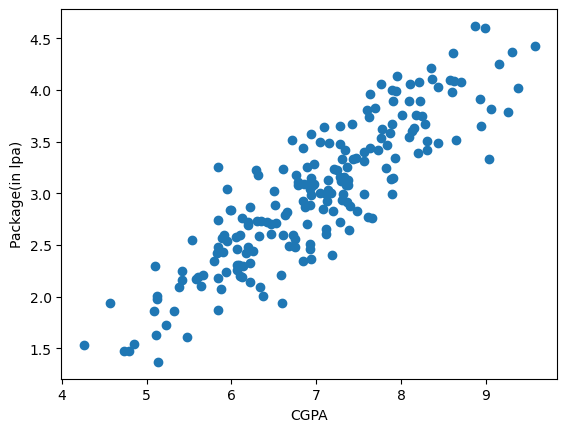

In [3]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [4]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [5]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
li = LinearRegression()

In [9]:
li.fit(X_train, y_train)

LinearRegression()

In [10]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [11]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [12]:
li.predict(X_test.iloc[3].values.reshape(1,1))

C:\Users\mahak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.57434935])

Text(0, 0.5, 'Package(in lpa)')

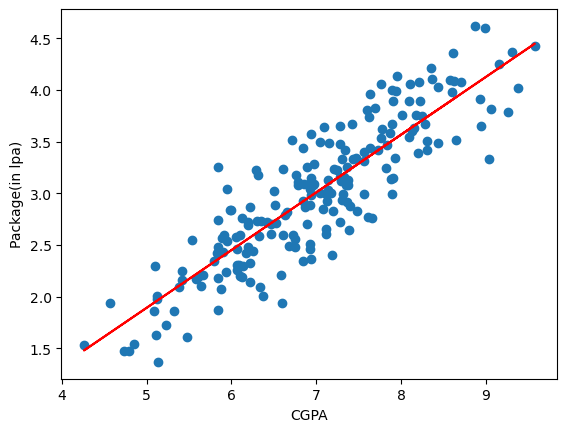

In [13]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train,li.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [14]:
# y= mx + b

m = li.coef_ # slope

In [15]:
b = li.intercept_  # intercept

In [16]:
m * 6.22 + b

array([2.57434935])

In [17]:
m

array([0.55795197])

In [18]:
b

-0.8961119222429144

In [22]:
y_pred = li.predict(X_test)

In [20]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [23]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.2884710931878175

In [24]:
mean_squared_error(y_test,y_pred)

0.12129235313495527

In [25]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.34827051717731616

In [29]:
#r2 score
r2 = r2_score(y_test,y_pred)
r2

0.780730147510384

In [30]:
X_test.shape

(40, 1)

In [31]:
#Absolute R2 Score
1 - ((1-r2)*(40-1) / (40-1-1))

0.7749598882343415

In [33]:
#What if we introduce a new random column which has no effect on the output column

new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)
new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.813611,3.26
1,5.12,0.786393,1.98
2,7.82,0.085845,3.25
3,7.42,0.136718,3.67
4,6.94,0.901851,3.57


Text(0, 0.5, 'Package(in lpa)')

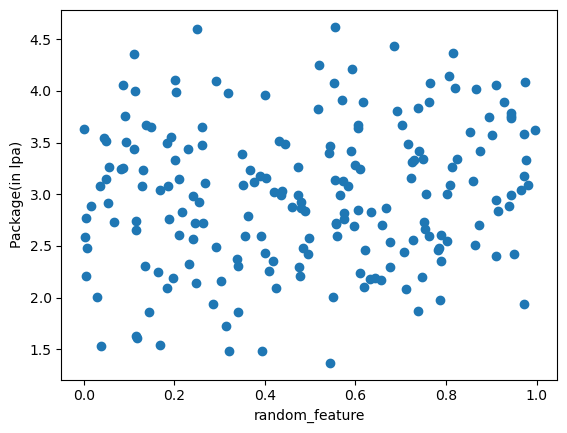

In [34]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [35]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)

In [40]:
r2_score(y_test,y_pred)

0.7811941742189918

In [41]:
1 - ((1-r2)*(40-1) / (40-1-2))

0.7688777230514858

In [42]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.head()

,cgpa,iq,package
0,6.89,4.26,3.26
1,5.12,0.98,1.98
2,7.82,3.65,3.25
3,7.42,4.67,3.67
4,6.94,3.87,3.57


Text(0, 0.5, 'Package(in lpa)')

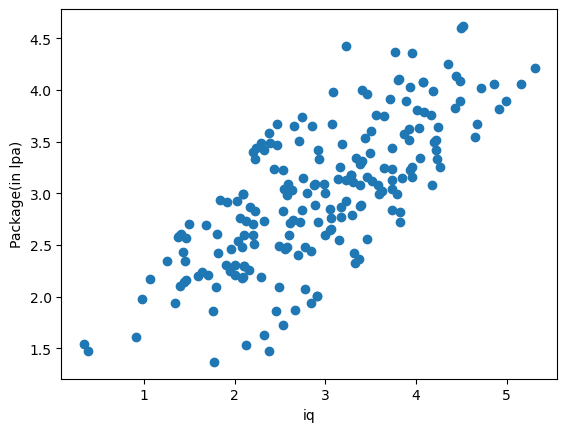

In [43]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [44]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [47]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7943311500464583


In [48]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7832139149138344